In [4]:
from skimage.io import imread_collection
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.fftpack as fp
from matplotlib import pyplot

# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './1111/*.jpg'
# collectionDir = './2222/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134918_/*.jpg'
# collectionDir = './zilia/Singe1/20200229_081046_Scan_singe1_day2/*.jpg'
collectionDir = './zilia/Singe2/20200229_085147_Retine_fixe_flicker_rlp70/*.jpg'

imageCollection = imread_collection(collectionDir)

counter=0
grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
grayImageCopy=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
#grayImage=np.zeros((len(imageCollection),1900,1900))
axis0Shift=np.array([])
axis1Shift=np.array([])
index=np.array([])
for i in range(len(imageCollection)):
    imageCollection[i][:,:,2]=0
    grayImage[i,:,:]=rgb2gray(imageCollection[i])
    grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=200)
    grayImage[i,:,:]=grayImage[i,:,:]**0.02
#     grayImage[i,:,:]=imageCollection[i][:,:,0]
    grayImage[i,:,:]=(grayImage[i,:,:]-np.min(grayImage[i,:,:]))/(np.max(grayImage[i,:,:])-np.min(grayImage[i,:,:]))

    grayImageCopy[i,:,:]=rgb2gray(imageCollection[i])
#     grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=200)


for i in range(len(imageCollection)):
    if (i>1 and i%2==1):
#         if (np.var(grayImage[i,:,:])<0.015 or np.std(grayImage[i,:,:])<0.01):
        if (np.mean(grayImage[i,:,:])>(np.mean(grayImage[1,:,:]+0.05)) or
           np.mean(grayImage[i,:,:])<(np.mean(grayImage[1,:,:]-0.05))):
            index=np.append(index,(i-1))
            index=np.append(index,(i))
            counter=counter+1

grayImage=np.delete(grayImage,index.astype(int),axis=0)
grayImageCopy=np.delete(grayImageCopy,index.astype(int),axis=0)
print(grayImage.shape)
print(counter)

for i in range(grayImage.shape[0]):
    
#     grayImage[i,:,:]=grayImage[i,:,:]**0.02
# #     grayImage[i,:,:]=imageCollection[i][:,:,0]
#     grayImage[i,:,:]=(grayImage[i,:,:]-np.min(grayImage[i,:,:]))/(np.max(grayImage[i,:,:])-np.min(grayImage[i,:,:]))
# #     grayImage[i,:,:]=imageCollection[i][:,:,1]

#     F1 = fp.fft2((grayImage[i,:,:]).astype(float))
#     F2 = fp.fftshift(F1)
#     (w, h) = grayImage[i,:,:].shape
#     half_w, half_h = int(w/2), int(h/2)
#     # high pass filter
#     n = 3
#     F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
#     grayImage[i,:,:] = fp.ifft2(fp.ifftshift(F2)).real
    if (i==1):
        window_name = 'Image'  
        center_coordinates = (1000,1000)

        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 255, 0)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(grayImageCopy[i,:,:], center_coordinates, radius, color, thickness)
        # Displaying the image 
        pyplot.imsave(str(i)+'.jpg',image)
        
    
    if (i>1 and i%2==1):
        axis0First=np.sum(grayImage[i-2,:,:],axis=0)
#         m, b = np.polyfit(np.array(range(0,axis0First.shape[0]))+1, axis0First, 1)
#         axis0First=axis0First-(m*(np.array(range(0,axis0First.shape[0]))+1)+b)
        axis1First=np.sum(grayImage[i-2,:,:],axis=1)
#         m, b = np.polyfit(np.array(range(0,axis1First.shape[0]))+1, axis1First, 1)
#         axis1First=axis1First-(m*(np.array(range(0,axis1First.shape[0]))+1)+b)
        axis0Second=np.sum(grayImage[i,:,:],axis=0)
#         m, b = np.polyfit(np.array(range(0,axis0Second.shape[0]))+1, axis0Second, 1)
#         axis0Second=axis0Second-(m*(np.array(range(0,axis0Second.shape[0]))+1)+b)
        axis1Second=np.sum(grayImage[i,:,:],axis=1)
#         m, b = np.polyfit(np.array(range(0,axis1Second.shape[0]))+1, axis1Second, 1)
#         axis1Second=axis1Second-(m*(np.array(range(0,axis1Second.shape[0]))+1)+b)
        
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)
#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
#         plt.show()
        print(i , '......' , np.std(grayImageCopy[i,:,:]))
        print(i , '......' , np.var(grayImageCopy[i,:,:]))
        print(i , '......' , np.mean(grayImageCopy[i,:,:]))
        print(np.argmax(axis0First)-np.argmax(axis0Second))
        print(np.argmax(axis1First)-np.argmax(axis1Second))
        axis0Shift=np.append(axis0Shift,(np.argmax(axis0Second)-np.argmax(axis0First)))
        axis1Shift=np.append(axis1Shift,(np.argmax(axis1Second)-np.argmax(axis1First)))
        

        window_name = 'Image'  
        # Center coordinates
#         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
        center_coordinates = (int(np.sum(axis0Shift)+1000),int(np.sum(axis1Shift)+1000))
         
        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 255, 0)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(grayImageCopy[i,:,:], center_coordinates, radius, color, thickness)
        # Displaying the image 
#         cv2.imwrite(str(i)+'.jpg',image)
#         cv2.imshow(window_name, grayImageCopy[i,:,:])
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        
        pyplot.imsave(str(i)+'.jpg',image)



(36, 2048, 2448)
0
(1000, 1000)
3 ...... 0.25111326537930184
3 ...... 0.06305787204945568
3 ...... 0.6032534886288135
-6
-1
(1006, 1001)
5 ...... 0.2505541640429669
5 ...... 0.06277738911926996
5 ...... 0.6026991369689926
-9
5
(1015, 996)
7 ...... 0.24992201663723823
7 ...... 0.06246101440002398
7 ...... 0.6020686151993638
-4
4
(1019, 992)
9 ...... 0.24981083836703624
9 ...... 0.0624054549656415
9 ...... 0.5986085900862483
-1
5
(1020, 987)
11 ...... 0.24974158719593728
11 ...... 0.06237086037514594
11 ...... 0.5985573536457047
-2
-3
(1022, 990)
13 ...... 0.24968577997532312
13 ...... 0.06234298872188548
13 ...... 0.5954058786255174
0
3
(1022, 987)
15 ...... 0.24985295905539762
15 ...... 0.062426501148738205
15 ...... 0.5958022731314713
0
-1
(1022, 988)
17 ...... 0.24907001963109943
17 ...... 0.06203587467903625
17 ...... 0.5901442400284532
-4
12
(1026, 976)
19 ...... 0.24812667331631014
19 ...... 0.061566846011018896
19 ...... 0.5864622878749469
-4
12
(1030, 964)
21 ...... 0.2481710550

In [185]:
from skimage.io import imread_collection
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.fftpack as fp
from matplotlib import pyplot

# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './1111/*.jpg'
# collectionDir = './2222/*.jpg'
# collectionDir = './zilia/Singe3/oeilDroit_singe3/20200229_090916_spectro180_RLP20/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134918_/*.jpg'
# collectionDir = './zilia/Singe1/20200229_081046_Scan_singe1_day2/*.jpg'
collectionDir = './zilia/Singe2/20200229_084156_singe2_scanRetine_day2/*.jpg'

imageCollection = imread_collection(collectionDir)

counter=0
grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
grayImageCopy=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
#grayImage=np.zeros((len(imageCollection),1900,1900))
axis0Shift=np.array([])
axis1Shift=np.array([])
index=np.array([])
for i in range(len(imageCollection)):
    imageCollection[i][:,:,2]=0
    grayImage[i,:,:]=rgb2gray(imageCollection[i])
    grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=200)
#     grayImage[i,:,:]=grayImage[i,:,:]**0.02
#     grayImage[i,:,:]=imageCollection[i][:,:,0]
    grayImage[i,:,:]=(grayImage[i,:,:]-np.min(grayImage[i,:,:]))/(np.max(grayImage[i,:,:])-np.min(grayImage[i,:,:]))

    grayImageCopy[i,:,:]=rgb2gray(imageCollection[i])
    grayImageCopy[i,:,:]=(grayImageCopy[i,:,:]-np.min(grayImageCopy[i,:,:]))/(np.max(grayImageCopy[i,:,:])-np.min(grayImageCopy[i,:,:]))

#     grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=200)


for i in range(len(imageCollection)):
    if (i>1 and i%2==1):
#         if (np.var(grayImage[i,:,:])<0.015 or np.std(grayImage[i,:,:])<0.01):
        if (np.mean(grayImageCopy[i,:,:])>(np.mean(grayImageCopy[1,:,:]+0.02)) or
           np.mean(grayImageCopy[i,:,:])<(np.mean(grayImageCopy[1,:,:]-0.02))):
            index=np.append(index,(i-1))
            index=np.append(index,(i))
            counter=counter+1

grayImage=np.delete(grayImage,index.astype(int),axis=0)
grayImageCopy=np.delete(grayImageCopy,index.astype(int),axis=0)
print(grayImage.shape)
print(counter)

for i in range(grayImage.shape[0]):
    
#     grayImage[i,:,:]=grayImage[i,:,:]**0.02
# #     grayImage[i,:,:]=imageCollection[i][:,:,0]
#     grayImage[i,:,:]=(grayImage[i,:,:]-np.min(grayImage[i,:,:]))/(np.max(grayImage[i,:,:])-np.min(grayImage[i,:,:]))
# #     grayImage[i,:,:]=imageCollection[i][:,:,1]

#     F1 = fp.fft2((grayImage[i,:,:]).astype(float))
#     F2 = fp.fftshift(F1)
#     (w, h) = grayImage[i,:,:].shape
#     half_w, half_h = int(w/2), int(h/2)
#     # high pass filter
#     n = 3
#     F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
#     grayImage[i,:,:] = fp.ifft2(fp.ifftshift(F2)).real
    if (i==0):
        window_name = 'Image'  
        center_coordinates = (1000,1000)

        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 255, 0)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(grayImageCopy[i,:,:], center_coordinates, radius, color, thickness)
        # Displaying the image 
        pyplot.imsave(str(i)+'.jpg',image)
        
    
    if (i>1 and i%2==1):
        axis0First=np.sum(grayImage[i-2,:,:],axis=0)
#         m, b = np.polyfit(np.array(range(0,axis0First.shape[0]))+1, axis0First, 1)
#         axis0First=axis0First-(m*(np.array(range(0,axis0First.shape[0]))+1)+b)
        axis1First=np.sum(grayImage[i-2,:,:],axis=1)
#         m, b = np.polyfit(np.array(range(0,axis1First.shape[0]))+1, axis1First, 1)
#         axis1First=axis1First-(m*(np.array(range(0,axis1First.shape[0]))+1)+b)
        axis0Second=np.sum(grayImage[i,:,:],axis=0)
#         m, b = np.polyfit(np.array(range(0,axis0Second.shape[0]))+1, axis0Second, 1)
#         axis0Second=axis0Second-(m*(np.array(range(0,axis0Second.shape[0]))+1)+b)
        axis1Second=np.sum(grayImage[i,:,:],axis=1)
#         m, b = np.polyfit(np.array(range(0,axis1Second.shape[0]))+1, axis1Second, 1)
#         axis1Second=axis1Second-(m*(np.array(range(0,axis1Second.shape[0]))+1)+b)
        
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)
#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
#         plt.show()
        print(i , '......' , np.std(grayImageCopy[i,:,:]))
        print(i , '......' , np.var(grayImageCopy[i,:,:]))
        print(i , '......' , np.mean(grayImageCopy[i,:,:]))
        print(np.argmax(axis0First)-np.argmax(axis0Second))
        print(np.argmax(axis1First)-np.argmax(axis1Second))
        axis0Shift=np.append(axis0Shift,(np.argmax(axis0Second)-np.argmax(axis0First)))
        axis1Shift=np.append(axis1Shift,(np.argmax(axis1Second)-np.argmax(axis1First)))
        

        window_name = 'Image'  
        # Center coordinates
#         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
        center_coordinates = (int(np.sum(axis0Shift)+1000),int(np.sum(axis1Shift)+1000))
         
        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 255, 0)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(grayImageCopy[i,:,:], center_coordinates, radius, color, thickness)
        # Displaying the image 
#         cv2.imwrite(str(i)+'.jpg',image)
#         cv2.imshow(window_name, grayImageCopy[i,:,:])
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        
        pyplot.imsave(str(i)+'.jpg',image)



KeyboardInterrupt: 

## Skeleton extraction

In [186]:
from skimage.io import imread_collection
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.fftpack as fp
from matplotlib import pyplot
from scipy.signal import find_peaks
from scipy import ndimage

def loadImages(collectionDir):
    imageCollection = imread_collection(collectionDir)
    grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
    for i in range(len(imageCollection)):
        imageCollection[i][:,:,2]=0
        grayImage[i,:,:]=rgb2gray(imageCollection[i])
#         grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=50)
#         grayImageCopy[i,:,:]=rgb2gray(imageCollection[i])  
    return grayImage
        

def intensityCheck(Image,laser):
    index=np.array([])
    for i in range(Image.shape[0]):
        if (np.mean(Image[i,:,:])>(np.mean(Image[0,:,:]+0.02)) or
           np.mean(Image[i,:,:])<(np.mean(Image[0,:,:]-0.02))):
            index=np.append(index,(i))
    Image=np.delete(Image,index.astype(int),axis=0)
    laser=np.delete(laser,index.astype(int),axis=0)
    return Image,laser

def seperateImages(grayImageCollection):
    Thresh=np.mean(grayImageCollection)
    counter=0
    Image=np.empty((1,grayImageCollection.shape[1], grayImageCollection.shape[2]), float)
    laserImage=np.empty((1,grayImageCollection.shape[1], grayImageCollection.shape[2]), float)
    temp=np.empty((1,grayImage.shape[1], grayImageCollection.shape[2]), float)
    for i in range(1,grayImageCollection.shape[0]):
        if (np.mean(grayImageCollection[i-1,:,:])>Thresh and np.mean(grayImageCollection[i,:,:])<Thresh):
            temp[0,:,:]=grayImageCollection[i-1,:,:]
            Image=np.vstack((Image,temp))
            temp[0,:,:]=grayImageCollection[i,:,:]
            laserImage=np.vstack((laserImage,temp))

    Image=np.delete(Image,0,axis=0)
    laserImage=np.delete(laserImage,0,axis=0)
    print(Image.shape)
    print(laserImage.shape)
    return Image,laserImage

import scipy.signal

def cross_image(im1, im2):
   # get rid of the color channels by performing a grayscale transform
   # the type cast into 'float' is to avoid overflows
   im1_gray = im1 #np.sum(im1.astype('float'), axis=2)
   im2_gray = im2 #np.sum(im2.astype('float'), axis=2)

   # get rid of the averages, otherwise the results are not good
   im1_gray -= np.mean(im1_gray)
   im2_gray -= np.mean(im2_gray)

   # calculate the correlation image; note the flipping of onw of the images
   return scipy.signal.fftconvolve(im1_gray, im2_gray[::-1,::-1], mode='same')



            

# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './1111/*.jpg'
# collectionDir = './2222/*.jpg'
# collectionDir = './zilia/singe2/20200229_084156_singe2_scanRetine_day2/*.jpg'
# collectionDir = './zilia/Singe3/oeilDroit_singe3/20200229_090916_spectro180_RLP20/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134918_/*.jpg'
# collectionDir = './zilia/Singe1/20200229_081046_Scan_singe1_day2/*.jpg'
# collectionDir = './zilia/Singe2/20200229_084156_singe2_scanRetine_day2/*.jpg'
collectionDir = './zilia/singe26/oeilDroit_singe26/20200303_100701_psr/*.jpg'

grayImage=np.array([])
Image=np.array([])
laser=np.array([])

grayImage=loadImages(collectionDir)
Image,laser=seperateImages(grayImage)   
# Image1.shape,laser1.shape=intensityCheck(Image,laser)

Margin=250
N=100
temp=Image[:,Margin:Image.shape[1]-Margin,Margin:Image.shape[2]-Margin]
skeletonImage=np.zeros(Image.shape)
a=np.zeros(Image.shape)
indexShift=np.array([0,0])
for j in range(temp.shape[0]):
# for j in range(2):
    for i in range(temp.shape[1]):
        y=np.convolve(temp[j,i,:], np.ones(N)/N, mode='valid')
        peaks, properties = find_peaks(-y,distance=250,prominence=0.001)
        skeletonImage[j,i+Margin,peaks+Margin]=1
    for i in range(temp.shape[2]):
        y=np.convolve(temp[j,:,i], np.ones(N)/N, mode='valid')
        peaks, properties = find_peaks(-y,distance=250,prominence=0.001)
        skeletonImage[j,peaks+Margin,i+Margin]=1
        
#     imgplot = plt.imshow(Image[j,:,:])
#     plt.colorbar(imgplot)
#     plt.show()  

    a[j,:,:]=ndimage.binary_closing(skeletonImage[j,:,:], structure=np.ones((20,20))).astype(np.int)
#     imgplot = plt.imshow(a)
#     plt.colorbar(imgplot)
#     plt.show()  

#     imgplot = plt.imshow(skeletonImage[j,:,:])
#     plt.colorbar(imgplot)
#     plt.show()  
    if (j>0):
        out1=cross_image(a[j-1,:,:],a[j,:,:])
        ind= np.unravel_index(np.argmax(out1, axis=None), out1.shape)
        indexShift=np.vstack((indexShift,np.array(ind)-np.array([a.shape[1]/2,a.shape[2]/2])))
        
        print(indexShift)
    
        window_name = 'Image'  
        # Center coordinates
    #         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
        center_coordinates = (1000-int(np.sum(indexShift[:,1])),1000-int(np.sum(indexShift[:,0])))

        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 255, 0)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(Image[j,:,:], center_coordinates, radius, color, thickness)
        # Displaying the image 
    #         cv2.imwrite(str(i)+'.jpg',image)
    #         cv2.imshow(window_name, grayImageCopy[i,:,:])
    #         cv2.waitKey(0)
    #         cv2.destroyAllWindows()

        pyplot.imsave(str(j)+'.jpg',image)

# out1=cross_image(a[0,:,:],a[1,:,:])
# imgplot = plt.imshow(out1)
# plt.colorbar(imgplot)
# plt.show()
# print( np.unravel_index(np.argmax(out1, axis=None), out1.shape))


# out1=cross_image(a[10,:,:],a[11,:,:])
# imgplot = plt.imshow(out1)
# plt.colorbar(imgplot)
# plt.show()
# print( np.unravel_index(np.argmax(out1, axis=None), out1.shape))
        
        
# fig, ax = plt.subplots()
# ax.plot(temp[0,750,:])
# ax.plot(y)



# ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#        title='About as simple as it gets, folks')
# ax.grid()
# ####
# #         fig.savefig("test.png")
# plt.show()


# counter=0
# Margin=250

# grayImageCopy=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
# skeletImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))

# axis0Shift=np.array([])
# axis1Shift=np.array([])
# index=np.array([])


#     temp=grayImage[i,Margin:grayImage[i,:,:].shape[0]-Margin,Margin:grayImage[i,:,:].shape[1]-Margin]

# a,b=seperateImages(grayImage)       
        
    
# for i in range(len(imageCollection)):
#     if (i>1 and i%2==1):
# #         if (np.var(grayImage[i,:,:])<0.015 or np.std(grayImage[i,:,:])<0.01):
#         if (np.mean(grayImageCopy[i,:,:])>(np.mean(grayImageCopy[1,:,:]+0.02)) or
#            np.mean(grayImageCopy[i,:,:])<(np.mean(grayImageCopy[1,:,:]-0.02))):
#             index=np.append(index,(i-1))
#             index=np.append(index,(i))
#             counter=counter+1

# grayImage=np.delete(grayImage,index.astype(int),axis=0)
# grayImageCopy=np.delete(grayImageCopy,index.astype(int),axis=0)
# print(grayImage.shape)
# print(counter)

# for i in range(grayImage.shape[0]):
    
# #     grayImage[i,:,:]=grayImage[i,:,:]**0.02
# # #     grayImage[i,:,:]=imageCollection[i][:,:,0]
# #     grayImage[i,:,:]=(grayImage[i,:,:]-np.min(grayImage[i,:,:]))/(np.max(grayImage[i,:,:])-np.min(grayImage[i,:,:]))
# # #     grayImage[i,:,:]=imageCollection[i][:,:,1]

# #     F1 = fp.fft2((grayImage[i,:,:]).astype(float))
# #     F2 = fp.fftshift(F1)
# #     (w, h) = grayImage[i,:,:].shape
# #     half_w, half_h = int(w/2), int(h/2)
# #     # high pass filter
# #     n = 3
# #     F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
# #     grayImage[i,:,:] = fp.ifft2(fp.ifftshift(F2)).real
#     if (i==0):
#         window_name = 'Image'  
#         center_coordinates = (1000,1000)

#         print(center_coordinates)
#         # Radius of circle
#         radius = 30
#         # Blue color in BGR
#         color = (0, 255, 0)
#         # Line thickness of 2 px
#         thickness = 5
#         # Using cv2.circle() method
#         # Draw a circle with blue line borders of thickness of 2 px
#         image = cv2.circle(grayImageCopy[i,:,:], center_coordinates, radius, color, thickness)
#         # Displaying the image 
#         pyplot.imsave(str(i)+'.jpg',image)
        
    
#     if (i>1 and i%2==1):
#         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
# #         m, b = np.polyfit(np.array(range(0,axis0First.shape[0]))+1, axis0First, 1)
# #         axis0First=axis0First-(m*(np.array(range(0,axis0First.shape[0]))+1)+b)
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
# #         m, b = np.polyfit(np.array(range(0,axis1First.shape[0]))+1, axis1First, 1)
# #         axis1First=axis1First-(m*(np.array(range(0,axis1First.shape[0]))+1)+b)
#         axis0Second=np.sum(grayImage[i,:,:],axis=0)
# #         m, b = np.polyfit(np.array(range(0,axis0Second.shape[0]))+1, axis0Second, 1)
# #         axis0Second=axis0Second-(m*(np.array(range(0,axis0Second.shape[0]))+1)+b)
#         axis1Second=np.sum(grayImage[i,:,:],axis=1)
# #         m, b = np.polyfit(np.array(range(0,axis1Second.shape[0]))+1, axis1Second, 1)
# #         axis1Second=axis1Second-(m*(np.array(range(0,axis1Second.shape[0]))+1)+b)
        
# #         fig, ax = plt.subplots()
# #         ax.plot(axis1First)
# #         ax.plot(axis1Second)
# #         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
# #                title='About as simple as it gets, folks')
# #         ax.grid()
# #         plt.show()
#         print(i , '......' , np.std(grayImageCopy[i,:,:]))
#         print(i , '......' , np.var(grayImageCopy[i,:,:]))
#         print(i , '......' , np.mean(grayImageCopy[i,:,:]))
#         print(np.argmax(axis0First)-np.argmax(axis0Second))
#         print(np.argmax(axis1First)-np.argmax(axis1Second))
#         axis0Shift=np.append(axis0Shift,(np.argmax(axis0Second)-np.argmax(axis0First)))
#         axis1Shift=np.append(axis1Shift,(np.argmax(axis1Second)-np.argmax(axis1First)))
        

#         window_name = 'Image'  
#         # Center coordinates
# #         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
#         center_coordinates = (int(np.sum(axis0Shift)+1000),int(np.sum(axis1Shift)+1000))
         
#         print(center_coordinates)
#         # Radius of circle
#         radius = 30
#         # Blue color in BGR
#         color = (0, 255, 0)
#         # Line thickness of 2 px
#         thickness = 5
#         # Using cv2.circle() method
#         # Draw a circle with blue line borders of thickness of 2 px
#         image = cv2.circle(grayImageCopy[i,:,:], center_coordinates, radius, color, thickness)
#         # Displaying the image 
# #         cv2.imwrite(str(i)+'.jpg',image)
# #         cv2.imshow(window_name, grayImageCopy[i,:,:])
# #         cv2.waitKey(0)
# #         cv2.destroyAllWindows()
        
#         pyplot.imsave(str(i)+'.jpg',image)



(114, 2048, 2448)
(114, 2048, 2448)
[[ 0.  0.]
 [-4. -3.]]
(1003, 1004)
[[ 0.  0.]
 [-4. -3.]
 [18. 10.]]
(993, 986)
[[ 0.  0.]
 [-4. -3.]
 [18. 10.]
 [31. 19.]]
(974, 955)
[[ 0.  0.]
 [-4. -3.]
 [18. 10.]
 [31. 19.]
 [-1. -1.]]
(975, 956)
[[ 0.  0.]
 [-4. -3.]
 [18. 10.]
 [31. 19.]
 [-1. -1.]
 [-9. -1.]]
(976, 965)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]]
(982, 980)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]]
(982, 982)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]]
(978, 973)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]]
(987, 978)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]]
(994, 982)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]]
(1003, 953)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]]
(1002, 956)
[[  0.   0.]
 [ -4.  -3.]

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]
 [  1.  -5.]
 [  3.   4.]
 [ -2.  -2.]
 [ -1.  -3.]
 [  0.   6.]
 [ -1.  10.]
 [ -7.   0.]
 [ -5.  -5.]
 [  3.  -3.]
 [  0.   1.]
 [  1.   9.]
 [ -5.  -9.]
 [ -3.  -5.]
 [  1.   0.]]
(1004, 971)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]
 [  1.  -5.]
 [  3.   4.]
 [ -2.  -2.]
 [ -1.  -3.]
 [  0.   6.]
 [ -1.  10.]
 [ -7.   0.]
 [ -5.  -5.]
 [  3.  -3.]
 [  0.   1.]
 [  1.   9.]
 [ -5.  -9.]
 [ -3.  -5.]
 [  1.   0.]
 [ -2.  -2.]
 [  2.  -2.]
 [  4.  -1.]
 [ -1.  -2.]
 [-13.   0.]
 [ -8.   2.]
 [ -8.   1.]
 [ -4.   6.]
 [ -1.   0.]
 [  2.   5.]
 [ -3.   0.]
 [ 26. -29.]]
(1026, 977)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]
 [  1.  -5.]
 [  3.   4.]
 [ -2.  -2.]
 [ -1.  -3.]
 [  0.   6.]
 [ -1.  10.]
 [ -7.   0.]
 [ -5.  -5.]
 [  3.  -3.]
 [  0.   1.]
 [  1.   9.]
 [ -5.  -9.]
 [ -3.  -5.]
 [  1.   0.]
 [ -2.  -2.]
 [  2.  -2.]
 [  4.  -1.]
 [ -1.  -2.]
 [-13.   0.]
 [ -8.   2.]
 [ -8.   1.]
 [ -4.   6.]
 [ -1.   0.]
 [  2.   5.]
 [ -3.   0.]
 [ 26. -29.]
 [-29.  20.]
 [ -2.   3.]
 [  5.   4.]
 [ -3.  12.]
 [ 75. -38.]
 [-35.   5.]
 [ 32.  36.]
 [-89. 190.]
 [-45.  34.]
 [-19.  31.]]
(729, 1087)
[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]
 [  1.  -5.]
 [  3.   4.]
 [ -2.  -2.]
 [ -1.  -3.]
 [  0.   6.]
 [ -1.  10.]
 [ -7.   0.]
 [ -5.  -5.]
 [  3.  -3.]
 [  0.   1.]
 [  1.   9.]
 [ -5.  -9.]
 [ -3.  -5.]
 [  1.   0.]
 [ -2.  -2.]
 [  2.  -2.]
 [  4.  -1.]
 [ -1.  -2.]
 [-13.   0.]
 [ -8.   2.]
 [ -8.   1.]
 [ -4.   6.]
 [ -1.   0.]
 [  2.   5.]
 [ -3.   0.]
 [ 26. -29.]
 [-29.  20.]
 [ -2.   3.]
 [  5.   4.]
 [ -3.  12.]
 [ 75. -38.]
 [-35.   5.]
 [ 32.  36.]
 [-89. 190.]
 [-45.  34.]
 [-19.  31.]
 [-11.  -1.]
 [ -7.  -5.]
 [  2.   4.]
 [  4.   6.]

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]
 [  1.  -5.]
 [  3.   4.]
 [ -2.  -2.]
 [ -1.  -3.]
 [  0.   6.]
 [ -1.  10.]
 [ -7.   0.]
 [ -5.  -5.]
 [  3.  -3.]
 [  0.   1.]
 [  1.   9.]
 [ -5.  -9.]
 [ -3.  -5.]
 [  1.   0.]
 [ -2.  -2.]
 [  2.  -2.]
 [  4.  -1.]
 [ -1.  -2.]
 [-13.   0.]
 [ -8.   2.]
 [ -8.   1.]
 [ -4.   6.]
 [ -1.   0.]
 [  2.   5.]
 [ -3.   0.]
 [ 26. -29.]
 [-29.  20.]
 [ -2.   3.]
 [  5.   4.]
 [ -3.  12.]
 [ 75. -38.]
 [-35.   5.]
 [ 32.  36.]
 [-89. 190.]
 [-45.  34.]
 [-19.  31.]
 [-11.  -1.]
 [ -7.  -5.]
 [  2.   4.]
 [  4.   6.]

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]
 [  1.  -5.]
 [  3.   4.]
 [ -2.  -2.]
 [ -1.  -3.]
 [  0.   6.]
 [ -1.  10.]
 [ -7.   0.]
 [ -5.  -5.]
 [  3.  -3.]
 [  0.   1.]
 [  1.   9.]
 [ -5.  -9.]
 [ -3.  -5.]
 [  1.   0.]
 [ -2.  -2.]
 [  2.  -2.]
 [  4.  -1.]
 [ -1.  -2.]
 [-13.   0.]
 [ -8.   2.]
 [ -8.   1.]
 [ -4.   6.]
 [ -1.   0.]
 [  2.   5.]
 [ -3.   0.]
 [ 26. -29.]
 [-29.  20.]
 [ -2.   3.]
 [  5.   4.]
 [ -3.  12.]
 [ 75. -38.]
 [-35.   5.]
 [ 32.  36.]
 [-89. 190.]
 [-45.  34.]
 [-19.  31.]
 [-11.  -1.]
 [ -7.  -5.]
 [  2.   4.]
 [  4.   6.]

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]
 [  1.  -5.]
 [  3.   4.]
 [ -2.  -2.]
 [ -1.  -3.]
 [  0.   6.]
 [ -1.  10.]
 [ -7.   0.]
 [ -5.  -5.]
 [  3.  -3.]
 [  0.   1.]
 [  1.   9.]
 [ -5.  -9.]
 [ -3.  -5.]
 [  1.   0.]
 [ -2.  -2.]
 [  2.  -2.]
 [  4.  -1.]
 [ -1.  -2.]
 [-13.   0.]
 [ -8.   2.]
 [ -8.   1.]
 [ -4.   6.]
 [ -1.   0.]
 [  2.   5.]
 [ -3.   0.]
 [ 26. -29.]
 [-29.  20.]
 [ -2.   3.]
 [  5.   4.]
 [ -3.  12.]
 [ 75. -38.]
 [-35.   5.]
 [ 32.  36.]
 [-89. 190.]
 [-45.  34.]
 [-19.  31.]
 [-11.  -1.]
 [ -7.  -5.]
 [  2.   4.]
 [  4.   6.]

[[  0.   0.]
 [ -4.  -3.]
 [ 18.  10.]
 [ 31.  19.]
 [ -1.  -1.]
 [ -9.  -1.]
 [-15.  -6.]
 [ -2.   0.]
 [  9.   4.]
 [ -5.  -9.]
 [ -4.  -7.]
 [  8.  -2.]
 [ 14.   9.]
 [  5.   1.]
 [  9.  -4.]
 [  1.  -3.]
 [  2.  -1.]
 [ -4.  -7.]
 [  0.  -4.]
 [  4.   4.]
 [-17.  14.]
 [ -6.   7.]
 [ -2.  -8.]
 [  1.  -7.]
 [  3.  -3.]
 [  2.  -5.]
 [  5.   2.]
 [  5.  11.]
 [ -6.   0.]
 [ -3.  -4.]
 [  3.   1.]
 [  9.  -2.]
 [  4.  -2.]
 [ -2.  -9.]
 [ -3.   6.]
 [ -3.  -3.]
 [ -3.   1.]
 [  1.  -5.]
 [  3.   4.]
 [ -2.  -2.]
 [ -1.  -3.]
 [  0.   6.]
 [ -1.  10.]
 [ -7.   0.]
 [ -5.  -5.]
 [  3.  -3.]
 [  0.   1.]
 [  1.   9.]
 [ -5.  -9.]
 [ -3.  -5.]
 [  1.   0.]
 [ -2.  -2.]
 [  2.  -2.]
 [  4.  -1.]
 [ -1.  -2.]
 [-13.   0.]
 [ -8.   2.]
 [ -8.   1.]
 [ -4.   6.]
 [ -1.   0.]
 [  2.   5.]
 [ -3.   0.]
 [ 26. -29.]
 [-29.  20.]
 [ -2.   3.]
 [  5.   4.]
 [ -3.  12.]
 [ 75. -38.]
 [-35.   5.]
 [ 32.  36.]
 [-89. 190.]
 [-45.  34.]
 [-19.  31.]
 [-11.  -1.]
 [ -7.  -5.]
 [  2.   4.]
 [  4.   6.]

In [248]:
d1=Image[69,:,:]
d1=256*((d1-np.min(d1))/(np.max(d1)-np.min(d1)))
resLap = cv2.Laplacian(d1, cv2.CV_64F)
score = resLap.var()
print(score)

27.48950866568406


In [258]:
# for kk in range(Image.shape[0]):
#     d1=Image[kk,:,:]
#     try1=256*((d1-np.min(d1))/(np.max(d1)-np.min(d1)))
#     fourier_image = np.fft.fftn(try1)
#     fourier_amplitudes = np.abs(fourier_image)
#     fourier_amplitudes=fourier_amplitudes/np.max(fourier_amplitudes)
#     print(kk)
#     print(np.var(d1))

ii=np.array([])
for kk in range(Image.shape[0]):
    d1=Image[kk,:,:]
    d1=256*((d1-np.min(d1))/(np.max(d1)-np.min(d1)))
    resLap = cv2.Laplacian(d1, cv2.CV_64F)
    score = resLap.var()
    ii=np.hstack((ii,score))
    print(kk)
    print(score)
# print(ii)

# d1=Image[60,:,:]
# d1=256*((d1-np.min(d1))/(np.max(d1)-np.min(d1)))
# resLap = cv2.Laplacian(d1, cv2.CV_64F)
# score = resLap.var()
# print(score)

# d1=Image[67,:,:]
# d1=256*((d1-np.min(d1))/(np.max(d1)-np.min(d1)))
# resLap = cv2.Laplacian(d1, cv2.CV_64F)
# score = resLap.var()
# print(score)



# try1=256*((d1-np.min(d1))/(np.max(d1)-np.min(d1)))
# hist,bins = np.histogram(try1.ravel(),256,[0,256])
# hist=hist/np.max(hist)
# print(np.std(hist))
# fig, ax = plt.subplots()
# ax.plot(hist)
# plt.show()

# d1=Image[0,:,:]
# try1=256*((d1-np.min(d1))/(np.max(d1)-np.min(d1)))
# hist,bins = np.histogram(try1.ravel(),256,[0,256])
# hist=hist/np.max(hist)
# print(np.std(hist))


# fig, ax = plt.subplots()
# ax.plot(hist)
# plt.show()

# d1=Image[60,:,:]
# try1=256*((d1-np.min(d1))/(np.max(d1)-np.min(d1)))
# hist,bins = np.histogram(try1.ravel(),256,[0,256])
# hist=hist/np.max(hist)
# print(np.std(hist))


# fig, ax = plt.subplots()
# ax.plot(hist)
# plt.show()


0
32.672779486299824
1
29.326974517804427
2
29.077650437389813
3
28.551160711901495
4
29.24585329768745
5
29.313153311858212
6
29.35539037362823
7
29.35813039666929
8
24.03430057857454
9
22.280321631249368
10
21.65285235580287
11
21.226342550885448
12
21.196743842022123
13
21.520943079129378
14
21.35691695335697
15
21.35147759135419
16
21.24491799918266
17
21.14496056791623
18
21.472096321152836
19
21.476269045038453
20
21.37701404078499
21
21.14666747014979
22
21.081429178343033
23
21.43016496200322
24
21.22350821849491
25
21.219794602127344
26
21.157349305848914
27
21.13304003553542
28
21.212254125107624
29
21.235942600593386
30
21.15850455333907
31
20.973228487948308
32
21.157371088636566
33
20.98409346434591
34
21.248959929391777
35
21.155644074956555
36
21.194207639808216
37
20.983317499631085
38
21.279077872345173
39
21.110046841609154
40
21.02975461899951
41
21.22676691761176
42
21.235237131286965
43
21.346308589174143
44
21.27989608656874
45
21.340685888980374
46
21.03537810856

In [262]:
print(np.mean(ii) +np.std(ii)/2)

23.75009988428147


[ 634 1153 1318]


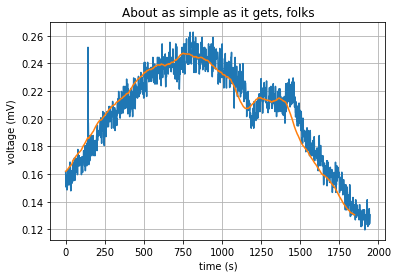

In [99]:
# imgplot = plt.imshow(a)
# plt.colorbar(imgplot)
# plt.show()
N=100
y=np.convolve(temp[0,1000,:], np.ones(N)/N, mode='valid')


# from scipy.signal import argrelextrema
# print(argrelextrema(y, np.less))
from scipy.signal import find_peaks
peaks, properties = find_peaks(-y,prominence=0.001)
print(peaks)

fig, ax = plt.subplots()
ax.plot(temp[0,1000,:])
ax.plot(y)



ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()
####
#         fig.savefig("test.png")
plt.show()



v

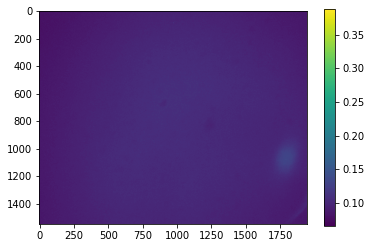

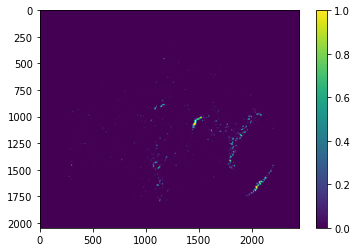

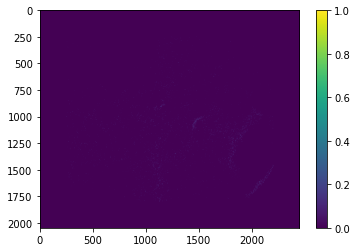

In [144]:
skeletonImage=np.zeros(Image.shape)
temp=laser[:,Margin:Image.shape[1]-Margin,Margin:Image.shape[2]-Margin]
j=2
for i in range(temp.shape[1]):
    y=np.convolve(temp[j,i,:], np.ones(N)/N, mode='valid')
    peaks, properties = find_peaks(-y,distance=200,prominence=0.001)
    skeletonImage[j,i+Margin,peaks+Margin]=1
for i in range(temp.shape[2]):
    y=np.convolve(temp[j,:,i], np.ones(N)/N, mode='valid')
    peaks, properties = find_peaks(-y,distance=200,prominence=0.001)
    skeletonImage[j,peaks+Margin,i+Margin]=1
    
from scipy import ndimage

imgplot = plt.imshow(temp[j,:,:])
plt.colorbar(imgplot)
plt.show()  

a=ndimage.binary_closing(skeletonImage[j,:,:], structure=np.ones((10,10))).astype(np.int)
imgplot = plt.imshow(a)
plt.colorbar(imgplot)
plt.show()  

imgplot = plt.imshow(skeletonImage[j,:,:])
plt.colorbar(imgplot)
plt.show()  

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


def lag_finder(y1, y2, sr):
    n = len(y1)

    corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])

    delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
    print(delay)
    print(np.argmax(corr))
    print('y2 is ' + str(delay) + ' behind y1')

    plt.figure()
    plt.plot(delay_arr, corr)
    plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
    plt.xlabel('Lag')
    plt.ylabel('Correlation coeff')
    plt.show()

############
from skimage.io import imread_collection
import numpy as np

collectionDir = './zilia/20200228_140744_singe2/*.jpg'
imageCollection = imread_collection(collectionDir)


from skimage.color import rgb2gray
grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
#grayImage=np.zeros((len(imageCollection),1900,1900))
axis0Shift=np.array([])
axis1Shift=np.array([])
for i in range(len(imageCollection)):
    grayImage[i,:,:]=((rgb2gray(imageCollection[i])-np.min(rgb2gray(imageCollection[i])))/
                        (np.max(rgb2gray(imageCollection[i]))-np.min(rgb2gray(imageCollection[i]))))
    #grayImage[i,:,:]=grayImage1[i,100:2000,100:2000]
    
    if (i>1 and i%2==1):
        axis0First=np.sum(grayImage[1,:,:],axis=0)
        axis1First=np.sum(grayImage[1,:,:],axis=1)
        axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis1Second=np.sum(grayImage[i,:,:],axis=1)
        sr = 1

        lag_finder(axis0First, axis0Second, sr)
#         convAxis0=np.convolve(axis0First,axis0Second)
#         convAxis1=np.convolve(axis1First,axis1Second)
#         axis0Shift=np.append(axis0Shift,(((grayImage[i,:,:].shape[1])/2)-np.argmax(convAxis0)))
#         axis1Shift=np.append(axis1Shift,(((grayImage[i,:,:].shape[0])/2)-np.argmax(convAxis1)))
#         print(np.argmax(convAxis0))
#         print(np.argmax(convAxis1))
        
        
#         fig, ax = plt.subplots()
#         ax.plot(convAxis0)
#         ax.plot(convAxis1)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()

#         fig.savefig("test.png")
#         plt.show()
        
# print(axis0Shift) 
# print(axis1Shift)
        
        
        

    
# Sine sample with some noise and copy to y1 and y2 with a 1-second lag


In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray

collectionDir = './1111/*.jpg'
imageCollection = imread_collection(collectionDir)



grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])
for i in range(len(imageCollection)):
#     temp=imageCollection[i][:,:,0]
#     imageCollection[i][:,:,2]=0
#     imageCollection[i][:,:,1]=0
#     grayImage[i,:,:]=100*rgb2gray(imageCollection[i])#-np.min(rgb2gray(imageCollection[i])))/
#                        (np.max(rgb2gray(imageCollection[i]))-np.min(rgb2gray(imageCollection[i]))))
    grayImage[i,:,:]=1.5*((imageCollection[i][:,:,0]))#-np.min(imageCollection[i][:,:,0]))/
#                         (np.max(imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0])))
    grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=100)
#     grayImage[grayImage >= 0.8] = 1
#     grayImage[grayImage <= 0.4] = 0
    

#### set test point
    if (i==1):
        #         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        testLoc0=np.argmax((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        testLoc1=np.argmax((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
        print(testLoc0,testLoc1)


    if (i>1 and i%2==1):
#         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        axis0First=((np.sum(grayImage[i-2,:,:],axis=0)-np.min(np.sum(grayImage[i-2,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i-2,:,:],axis=0))-np.min(np.sum(grayImage[i-2,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        axis1First=((np.sum(grayImage[i-2,:,:],axis=1)-np.min(np.sum(grayImage[i-2,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i-2,:,:],axis=1))-np.min(np.sum(grayImage[i-2,:,:],axis=1))))
#         axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis0Second=((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))
#         axis1Second=np.sum(grayImage[i,:,:],axis=1)
        axis1Second=((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
#         convAxis0=np.convolve(axis0First,axis0Second)
#         convAxis1=np.convolve(axis1First,axis1Second)
#         axis0Shift=np.append(axis0Shift,(np.argmax(axis0First)-np.argmax(axis0Second)))
#         axis1Shift=np.append(axis1Shift,(np.argmax(axis1First)-np.argmax(axis1Second)))
        axis0Shift=np.append(axis0Shift,(testLoc0-np.argmax(axis0Second)))
        axis1Shift=np.append(axis1Shift,(testLoc1-np.argmax(axis1Second)))



#         print(np.argmax(convAxis0))
#         print(np.argmax(convAxis1))
        
        
        window_name = 'Image'  
        # Center coordinates
#         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
        center_coordinates = (int(np.argmax(axis0Second)),int(np.argmax(axis1Second)))
         
        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 255, 0)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(imageCollection[i], center_coordinates, radius, color, thickness)
        # Displaying the image 
        cv2.imshow(window_name, imageCollection[i])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        
#         fig, ax = plt.subplots()
#         ax.plot(axis0First)
#         ax.plot(axis0Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()

# #         fig.savefig("test.png")
#         plt.show()


        
print(axis0Shift) 
print(axis1Shift)
        
        
        


In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt


collectionDir = './1111/*.jpg'
imageCollection = imread_collection(collectionDir)



grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])
for i in range(len(imageCollection)):
#     temp=imageCollection[i][:,:,0]
#     imageCollection[i][:,:,2]=0
#     imageCollection[i][:,:,1]=0
#     grayImage[i,:,:]=100*rgb2gray(imageCollection[i])#-np.min(rgb2gray(imageCollection[i])))/
#                        (np.max(rgb2gray(imageCollection[i]))-np.min(rgb2gray(imageCollection[i]))))
    grayImage[i,:,:]=1.5*((imageCollection[i][:,:,0]))#-np.min(imageCollection[i][:,:,0]))/
#                         (np.max(imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0])))
#     grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=100)
#     grayImage[grayImage >= 0.8] = 1
#     grayImage[grayImage <= 0.4] = 0
    

#### set test point
    if (i==1):
        #         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        testLoc0=np.argmax((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        testLoc1=np.argmax((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
        print(testLoc0,testLoc1)
#         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        axis0First=((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        axis1First=((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))

        #Zero padding
        zeroPad0=np.zeros((3*axis0First.shape[0],))
        zeroPad0[int(axis0First.shape[0]):int(zeroPad0.shape[0]-axis0First.shape[0])]=axis0First
        zeroPad1=np.zeros((3*axis1First.shape[0],))
        zeroPad1[int(axis1First.shape[0]):int(zeroPad1.shape[0]-axis1First.shape[0])]=axis1First

    if (i>1 and i%2==1):
#         axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis0Second=((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))
#         axis1Second=np.sum(grayImage[i,:,:],axis=1)
        axis1Second=((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
                        (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
#         convAxis0=np.convolve(axis0First,axis0Second)
#         convAxis1=np.convolve(axis1First,axis1Second)
#         axis0Shift=np.append(axis0Shift,(np.argmax(axis0First)-np.argmax(axis0Second)))
#         axis1Shift=np.append(axis1Shift,(np.argmax(axis1First)-np.argmax(axis1Second)))

        Cor0=np.zeros((2*axis0Second.shape[0],))
        Cor1=np.zeros((2*axis1Second.shape[0],))
        for j in range(2*axis0Second.shape[0]):
            r = np.corrcoef(axis0Second, zeroPad0[j:int(axis0Second.shape[0]+j)])
            Cor0[j]=r[1,0]
        for j in range(2*axis1Second.shape[0]):
            r = np.corrcoef(axis1Second, zeroPad1[j:int(axis1Second.shape[0]+j)])
            Cor1[j]=r[1,0]

        fig, ax = plt.subplots()
        ax.plot(Cor0)
        ax.plot(Cor1)


        ax.set(xlabel='time (s)', ylabel='voltage (mV)',
               title='About as simple as it gets, folks')
        ax.grid()
####
#         fig.savefig("test.png")
        plt.show()
        fig, ax = plt.subplots()
        ax.plot(axis1First)
        ax.plot(axis1Second)


        ax.set(xlabel='time (s)', ylabel='voltage (mV)',
               title='About as simple as it gets, folks')
        ax.grid()

#         fig.savefig("test.png")
        plt.show()
            
            

#         axis0Shift=np.append(axis0Shift,(testLoc0-np.argmax(axis0Second)))
#         axis1Shift=np.append(axis1Shift,(testLoc1-np.argmax(axis1Second)))



#         print(np.argmax(convAxis0))
#         print(np.argmax(convAxis1))
        
        
#         window_name = 'Image'  
#         # Center coordinates
# #         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
#         center_coordinates = (int(np.argmax(axis0Second)),int(np.argmax(axis1Second)))
         
#         print(center_coordinates)
#         # Radius of circle
#         radius = 30
#         # Blue color in BGR
#         color = (0, 255, 0)
#         # Line thickness of 2 px
#         thickness = 5
#         # Using cv2.circle() method
#         # Draw a circle with blue line borders of thickness of 2 px
#         image = cv2.circle(imageCollection[i], center_coordinates, radius, color, thickness)
#         # Displaying the image 
#         cv2.imshow(window_name, imageCollection[i])
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        
        
#         fig, ax = plt.subplots()
#         ax.plot(axis0First)
#         ax.plot(axis0Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()

# #         fig.savefig("test.png")
#         plt.show()


        
# print(axis0Shift) 
# print(axis1Shift)
        
        
        


In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt


collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
# collectionDir = './1111/*.jpg'
imageCollection = imread_collection(collectionDir)



grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])

for k in range(len(imageCollection)):
    imageCollection[k][:,:,2]=0
#     imageCollection[k][:,:,1]=0
#     imageCollection[k][:,:,0]=0
    grayImage[k,:,:]=(rgb2gray(imageCollection[k]))

grayImage=(grayImage-np.min(grayImage))/(np.max(grayImage)-np.min(grayImage))
grayImage[grayImage >= 0.7] = 1
grayImage[grayImage <= 0.3] = 0
        
for i in range(len(imageCollection)):
#     temp=imageCollection[i][:,:,0]
#     imageCollection[i][:,:,2]=0
#     imageCollection[i][:,:,0]=0
#     imageCollection[i][:,:,1]=0
#     gamma=5
#     imageCollection[i][:,:,1]=(imageCollection[i][:,:,1])*gamma
#     gamma=0.5
#     imageCollection[i][:,:,0]=(imageCollection[i][:,:,0])**gamma
#     imageCollection[i][:,:,0]=0
#     imageCollection[i][:,:,1]=(imageCollection[i][:,:,0])**gamma
#     grayImage[i,:,:]=(rgb2gray(imageCollection[i]))#-np.min((rgb2gray(imageCollection[i]))))/
#                        (np.max((rgb2gray(imageCollection[i])))-np.min((rgb2gray(imageCollection[i])))))
#     grayImage[i,:,:]=(((imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0]))/
#                         (np.max(imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0])))
#     grayImage[i,:,:]=(grayImage[i,:,:])**gamma
#     grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=100)

    

# ### set test point
#     if (i==1):
#         #         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
#         testLoc0=np.argmax((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))        
# #         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
#         testLoc1=np.argmax((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))

    if (i>1 and i%2==1):
               
#         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        axis0First=np.sum(grayImage[1,:,:],axis=0)#-np.min(np.sum(grayImage[i-2,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i-2,:,:],axis=0))-np.min(np.sum(grayImage[i-2,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        axis1First=np.sum(grayImage[1,:,:],axis=1)#-np.min(np.sum(grayImage[i-2,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i-2,:,:],axis=1))-np.min(np.sum(grayImage[i-2,:,:],axis=1))))

        #Zero padding
        padSize=500
        zeroPad0=np.zeros((axis0First.shape[0]+2*padSize,))
        zeroPad0[padSize:int(zeroPad0.shape[0]-padSize)]=axis0First
        zeroPad1=np.zeros((axis1First.shape[0]+2*padSize,))
        zeroPad1[padSize:int(zeroPad1.shape[0]-padSize)]=axis1First

#         axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis0Second=np.sum(grayImage[i,:,:],axis=0)#-np.min(np.sum(grayImage[i,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))
#         axis1Second=np.sum(grayImage[i,:,:],axis=1)
        axis1Second=np.sum(grayImage[i,:,:],axis=1)#-np.min(np.sum(grayImage[i,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
#         convAxis0=np.convolve(axis0First,axis0Second)
#         convAxis1=np.convolve(axis1First,axis1Second)
#         axis0Shift=np.append(axis0Shift,(np.argmax(axis0First)-np.argmax(axis0Second)))
#         axis1Shift=np.append(axis1Shift,(np.argmax(axis1First)-np.argmax(axis1Second)))

        Cor0=np.zeros((2*padSize,))
        Cor1=np.zeros((2*padSize,))
        for j in range(2*padSize):
            r = np.corrcoef(axis0Second, zeroPad0[j:int(axis0Second.shape[0]+j)])
            Cor0[j]=r[1,0]
        for j in range(2*padSize):
            r = np.corrcoef(axis1Second, zeroPad1[j:int(axis1Second.shape[0]+j)])
            Cor1[j]=r[1,0]
        
        axis0Shift=np.append(axis0Shift,(np.argmax(Cor0)-padSize))
        axis1Shift=np.append(axis1Shift,(np.argmax(Cor1)-padSize))
        print(axis0Shift)
        print(axis1Shift)


        
#         fig, ax = plt.subplots()
#         ax.plot(Cor0)
#         ax.plot(Cor1)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()

# #         fig.savefig("test.png")
#         plt.show()
            
            



#         print(np.argmax(convAxis0))
#         print(np.argmax(convAxis1))
        
        
        window_name = 'Image'  
        # Center coordinates
#         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
#         center_coordinates = (int(1000-np.sum(axis0Shift)),int(2000-np.sum(axis1Shift)))
        center_coordinates = (int(1000-((np.argmax(Cor0)-padSize))),int(1000-((np.argmax(Cor1)-padSize))))
         
        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 0, 255)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(imageCollection[i], center_coordinates, radius, color, thickness)
        # Displaying the image 
        cv2.imshow(window_name, imageCollection[i])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        
#         fig, ax = plt.subplots()
#         ax.plot(axis0First)
#         ax.plot(axis0Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# #         fig.savefig("test.png")
#         plt.show()


        
# print(axis0Shift) 
# print(axis1Shift)
        
        
        


In [ ]:
imageCollection[10][:,:,2]=0

In [ ]:
window_name = 'Image'  

cv2.imshow(window_name,imageCollection[5])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt


collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
# collectionDir = './1111/*.jpg'
imageCollection = imread_collection(collectionDir)



grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])

In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt


# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
collectionDir = './2222/*.jpg'
imageCollection = imread_collection(collectionDir)



grayImage1.shape=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])

for k in range(len(imageCollection)):
    imageCollection[k][:,:,2]=0
    gamma=0.02
    grayImage1[k,:,:]=((rgb2gray(imageCollection[k]))**gamma)

grayImage=grayImage1[:,400:grayImage.shape[1]-400,400:grayImage.shape[2]-400]
# grayImage=(grayImage-np.min(grayImage))/(np.max(grayImage)-np.min(grayImage))
# grayImage[grayImage >= 0.7] = 1
# grayImage[grayImage <= 0.3] = 0
        
for i in range(len(imageCollection)):
#     temp=imageCollection[i][:,:,0]
#     imageCollection[i][:,:,2]=0
#     imageCollection[i][:,:,0]=0
#     imageCollection[i][:,:,1]=0
#     gamma=5
#     imageCollection[i][:,:,1]=(imageCollection[i][:,:,1])*gamma
#     gamma=0.5
#     imageCollection[i][:,:,0]=(imageCollection[i][:,:,0])**gamma
#     imageCollection[i][:,:,0]=0
#     imageCollection[i][:,:,1]=(imageCollection[i][:,:,0])**gamma
#     grayImage[i,:,:]=(rgb2gray(imageCollection[i]))#-np.min((rgb2gray(imageCollection[i]))))/
# #                        (np.max((rgb2gray(imageCollection[i])))-np.min((rgb2gray(imageCollection[i])))))
# #     grayImage[i,:,:]=(((imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0]))/
# #                         (np.max(imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0])))
# #     grayImage[i,:,:]=(grayImage[i,:,:])**gamma
# #     grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=100)
#     grayImage[grayImage >= 0.7] = 1
#     grayImage[grayImage <= 0.3] = 0

    

# ### set test point
#     if (i==1):
#         #         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
#         testLoc0=np.argmax((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))        
# #         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
#         testLoc1=np.argmax((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))

    if (i>1 and i%2==1):
               
#         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        axis0First=np.std(grayImage[i-2,:,:],axis=0)#-np.min(np.sum(grayImage[i-2,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i-2,:,:],axis=0))-np.min(np.sum(grayImage[i-2,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        axis1First=np.std(grayImage[i-2,:,:],axis=1)#-np.min(np.sum(grayImage[i-2,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i-2,:,:],axis=1))-np.min(np.sum(grayImage[i-2,:,:],axis=1))))

        #Zero padding
        padSize=500
        zeroPad0=np.zeros((axis0First.shape[0]+2*padSize,))
        zeroPad0[padSize:int(zeroPad0.shape[0]-padSize)]=axis0First
        zeroPad1=np.zeros((axis1First.shape[0]+2*padSize,))
        zeroPad1[padSize:int(zeroPad1.shape[0]-padSize)]=axis1First

#         axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis0Second=np.std(grayImage[i,:,:],axis=0)#-np.min(np.sum(grayImage[i,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))
#         axis1Second=np.sum(grayImage[i,:,:],axis=1)
        axis1Second=np.std(grayImage[i,:,:],axis=1)#-np.min(np.sum(grayImage[i,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
#         convAxis0=np.convolve(axis0First,axis0Second)
#         convAxis1=np.convolve(axis1First,axis1Second)
#         axis0Shift=np.append(axis0Shift,(np.argmax(axis0First)-np.argmax(axis0Second)))
#         axis1Shift=np.append(axis1Shift,(np.argmax(axis1First)-np.argmax(axis1Second)))

        Cor0=np.zeros((2*padSize,))
        Cor1=np.zeros((2*padSize,))
        for j in range(2*padSize):
            r = np.corrcoef(axis0Second, zeroPad0[j:int(axis0Second.shape[0]+j)])
            Cor0[j]=r[1,0]
        for j in range(2*padSize):
            r = np.corrcoef(axis1Second, zeroPad1[j:int(axis1Second.shape[0]+j)])
            Cor1[j]=r[1,0]
        
        axis0Shift=np.append(axis0Shift,(np.argmax(Cor0)-padSize))
        axis1Shift=np.append(axis1Shift,(np.argmax(Cor1)-padSize))
        print(axis0Shift)
        print(axis1Shift)


        
#         fig, ax = plt.subplots()
#         ax.plot(Cor0)
#         ax.plot(Cor1)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()

# #         fig.savefig("test.png")
#         plt.show()
            
            



#         print(np.argmax(convAxis0))
#         print(np.argmax(convAxis1))
        
        
        window_name = 'Image'  
        # Center coordinates
#         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
        center_coordinates = (int(1000-np.sum(axis0Shift)),int(1000-np.sum(axis1Shift)))
#         center_coordinates = (int(1000-((np.argmax(Cor0)-padSize))),int(1000-((np.argmax(Cor1)-padSize))))
         
        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 0, 255)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(imageCollection[i], center_coordinates, radius, color, thickness)
        # Displaying the image 
        cv2.imshow(window_name, imageCollection[i])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        
#         fig, ax = plt.subplots()
#         ax.plot(axis0First)
#         ax.plot(axis0Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# #         fig.savefig("test.png")
#         plt.show()


        
# print(axis0Shift) 
# print(axis1Shift)
        
        
        


In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
collectionDir = './2222/*.jpg'
imageCollection = imread_collection(collectionDir)

grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])
gamma=0.01
# const=1000
for k in range(len(imageCollection)):
    imageCollection[k][:,:,2]=0
#     imageCollection[k][:,:,1]=0
#     imageCollection[k][:,:,0]=0
    
    grayImage[k,:,:]=((rgb2gray(imageCollection[k]))**gamma)
    
# grayImage=100*((grayImage-np.min(grayImage))/(np.max(grayImage)-np.min(grayImage)))
# grayImage=grayImage**1.5+

for k in range(len(imageCollection)):
    imgplot = plt.imshow(grayImage[k,:,:])
    plt.colorbar(imgplot)
    plt.show()
    
for i in range(len(imageCollection)):
#     temp=imageCollection[i][:,:,0]
#     imageCollection[i][:,:,2]=0
#     imageCollection[i][:,:,0]=0
#     imageCollection[i][:,:,1]=0
#     gamma=5
#     imageCollection[i][:,:,1]=(imageCollection[i][:,:,1])*gamma
#     gamma=0.5
#     imageCollection[i][:,:,0]=(imageCollection[i][:,:,0])**gamma
#     imageCollection[i][:,:,0]=0
#     imageCollection[i][:,:,1]=(imageCollection[i][:,:,0])**gamma
#     grayImage[i,:,:]=(rgb2gray(imageCollection[i]))#-np.min((rgb2gray(imageCollection[i]))))/
# #                        (np.max((rgb2gray(imageCollection[i])))-np.min((rgb2gray(imageCollection[i])))))
# #     grayImage[i,:,:]=(((imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0]))/
# #                         (np.max(imageCollection[i][:,:,0])-np.min(imageCollection[i][:,:,0])))
# #     grayImage[i,:,:]=(grayImage[i,:,:])**gamma
# #     grayImage[i,:,:]=gaussian_filter(grayImage[i,:,:], sigma=100)
#     grayImage[grayImage >= 0.7] = 1
#     grayImage[grayImage <= 0.3] = 0

    

# ### set test point
#     if (i==1):
#         #         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
#         testLoc0=np.argmax((np.sum(grayImage[i,:,:],axis=0)-np.min(np.sum(grayImage[i,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))        
# #         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
#         testLoc1=np.argmax((np.sum(grayImage[i,:,:],axis=1)-np.min(np.sum(grayImage[i,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))

    if (i>1 and i%2==1):
               
#         axis0First=np.sum(grayImage[i-2,:,:],axis=0)
        axis0First=np.std(grayImage[i-2,:,:],axis=0)#-np.min(np.sum(grayImage[i-2,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i-2,:,:],axis=0))-np.min(np.sum(grayImage[i-2,:,:],axis=0))))        
#         axis1First=np.sum(grayImage[i-2,:,:],axis=1)
        axis1First=np.std(grayImage[i-2,:,:],axis=1)#-np.min(np.sum(grayImage[i-2,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i-2,:,:],axis=1))-np.min(np.sum(grayImage[i-2,:,:],axis=1))))

        #Zero padding
        padSize=500
        zeroPad0=np.zeros((axis0First.shape[0]+2*padSize,))
        zeroPad0[padSize:int(zeroPad0.shape[0]-padSize)]=axis0First
        zeroPad1=np.zeros((axis1First.shape[0]+2*padSize,))
        zeroPad1[padSize:int(zeroPad1.shape[0]-padSize)]=axis1First

#         axis0Second=np.sum(grayImage[i,:,:],axis=0)
        axis0Second=np.std(grayImage[i,:,:],axis=0)#-np.min(np.sum(grayImage[i,:,:],axis=0)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=0))-np.min(np.sum(grayImage[i,:,:],axis=0))))
#         axis1Second=np.sum(grayImage[i,:,:],axis=1)
        axis1Second=np.std(grayImage[i,:,:],axis=1)#-np.min(np.sum(grayImage[i,:,:],axis=1)))/
#                         (np.max(np.sum(grayImage[i,:,:],axis=1))-np.min(np.sum(grayImage[i,:,:],axis=1))))
#         convAxis0=np.convolve(axis0First,axis0Second)
#         convAxis1=np.convolve(axis1First,axis1Second)
#         axis0Shift=np.append(axis0Shift,(np.argmax(axis0First)-np.argmax(axis0Second)))
#         axis1Shift=np.append(axis1Shift,(np.argmax(axis1First)-np.argmax(axis1Second)))

        Cor0=np.zeros((2*padSize,))
        Cor1=np.zeros((2*padSize,))
        for j in range(2*padSize):
            r = np.corrcoef(axis0Second, zeroPad0[j:int(axis0Second.shape[0]+j)])
            Cor0[j]=r[1,0]
        for j in range(2*padSize):
            r = np.corrcoef(axis1Second, zeroPad1[j:int(axis1Second.shape[0]+j)])
            Cor1[j]=r[1,0]
        
        axis0Shift=np.append(axis0Shift,(np.argmax(Cor0)-padSize))
        axis1Shift=np.append(axis1Shift,(np.argmax(Cor1)-padSize))
        print(axis0Shift)
        print(axis1Shift)


        
#         fig, ax = plt.subplots()
#         ax.plot(Cor0)
#         ax.plot(Cor1)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()

# #         fig.savefig("test.png")
#         plt.show()
            
            



#         print(np.argmax(convAxis0))
#         print(np.argmax(convAxis1))
        
        
        window_name = 'Image'  
        # Center coordinates
#         center_coordinates = (int(testLoc0+np.sum(axis0Shift)),int(testLoc1-np.sum(axis1Shift)))
        center_coordinates = (int(1000-np.sum(axis0Shift)),int(1800-np.sum(axis1Shift)))
#         center_coordinates = (int(1000-((np.argmax(Cor0)-padSize))),int(1000-((np.argmax(Cor1)-padSize))))
         
        print(center_coordinates)
        # Radius of circle
        radius = 30
        # Blue color in BGR
        color = (0, 0, 255)
        # Line thickness of 2 px
        thickness = 5
        # Using cv2.circle() method
        # Draw a circle with blue line borders of thickness of 2 px
        image = cv2.circle(imageCollection[i], center_coordinates, radius, color, thickness)
        # Displaying the image 
        cv2.imshow(window_name, imageCollection[i])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        
#         fig, ax = plt.subplots()
#         ax.plot(axis0First)
#         ax.plot(axis0Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# ####
# #         fig.savefig("test.png")
#         plt.show()
#         fig, ax = plt.subplots()
#         ax.plot(axis1First)
#         ax.plot(axis1Second)


#         ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#                title='About as simple as it gets, folks')
#         ax.grid()
# #         fig.savefig("test.png")
#         plt.show()


        
# print(axis0Shift) 
# print(axis1Shift)
        
        
        



In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
collectionDir = './2222/*.jpg'
imageCollection = imread_collection(collectionDir)

grayImage=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])
gamma=0.5
const=1
for k in range(len(imageCollection)):
#     imageCollection[k][:,:,2]=0
#     imageCollection[k][:,:,1]=0
#     imageCollection[k][:,:,0]=0
    
    grayImage[k,:,:]=const*((rgb2gray(imageCollection[k]))**gamma)
    
# grayImage=((grayImage-np.min(grayImage))/(np.max(grayImage)-np.min(grayImage)))
# grayImage1=1000*((grayImage-np.min(grayImage))/(np.max(grayImage)-np.min(grayImage)))
# grayImage1=grayImage1**1.5

# for k in range(len(imageCollection)):
#     imgplot = plt.imshow(grayImage[k,:,:])
#     plt.colorbar(imgplot)
#     plt.show()
    
# from skimage import feature

# edges1 = feature.canny(grayImage1[1,:,:])
# imgplot = plt.imshow(edges1)
# plt.colorbar(imgplot)
# plt.show()
# edges2 = feature.canny(grayImage1[1,:,:], sigma=3)
# imgplot = plt.imshow(20*((1-(edges2)**2)+grayImage[1,:,:]))
# plt.colorbar(imgplot)
# plt.show()
# edges3 = feature.canny(grayImage1[1,:,:], sigma=4)
# imgplot = plt.imshow(20*(edges3+grayImage[1,:,:]))
# plt.colorbar(imgplot)
# plt.show()
# grayImage[grayImage<=0.4]=0
imgplot = plt.imshow(grayImage[1,:,:])
plt.colorbar(imgplot)
plt.show()



In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
collectionDir = './2222/*.jpg'
imageCollection = imread_collection(collectionDir)

grayImage1=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])
gamma=1
for k in range(len(imageCollection)):
    
    grayImage1[k,:,:]=((rgb2gray(imageCollection[k]))**gamma)

grayImage=grayImage1[:,500:grayImage1.shape[1]-500,500:grayImage1.shape[2]-500]
imgplot = plt.imshow(grayImage[1,:,:])
plt.colorbar(imgplot)
plt.show()

window=100
t1=0.015 #threshold for variance

def interest_operator(I, i, j, w ):
#     \w is the halfwidth of operator window"
#     \See alternate texture-based interest operator in the exercises."
    v1=np.var(I[int(i+w/2):int(i+1.5*w),j])
    v2=np.var(I[i,int(j+w/2):int(j+1.5*w)])
    v3=np.var(np.diagonal(I[int(i+w/2):int(i+1.5*w),int(j+w/2):int(j+1.5*w)]))
    v4=np.var(np.diagonal(np.fliplr(I[int(i+w/2):int(i+1.5*w),int(j+w/2):int(j+1.5*w)])))

    return np.min([v1,v2,v3,v4])
    

def detect_corner_points(I,w,t):
# \I[r; c] is an input image of MaxRow rows and MaxCol columns"
# \V is an output set of interesting points from I."
# \t1 is a threshold on the interest operator output"
# \w is the halfwidth of the neighborhood for the interest operator"
    V=np.zeros((I.shape[0]-w,I.shape[1]-w))
    for i in range(I.shape[0]-w):
        for j in range(I.shape[1]-w):
#             V[int(i),int(j)]=(np.std(I[int(i+w/2):int(i+1.5*w),int(j+w/2):int(j+1.5*w)]))
            V[i,j]=interest_operator(I,i,j,w)
    
    imgplot = plt.imshow(V)
    plt.colorbar(imgplot)
    plt.show()
    return V

result=detect_corner_points(grayImage[5,:,:],window,t1)

In [ ]:
from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
import scipy.fftpack as fp


# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
collectionDir = './2222/*.jpg'
imageCollection = imread_collection(collectionDir)



greenChannel=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
edges=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
axis0Shift=np.array([])
axis1Shift=np.array([])

for k in range(len(imageCollection)):
    greenChannel[k,:,:]=imageCollection[k][:,:,1]
    
    F1 = fp.fft2((greenChannel[k,:,:]).astype(float))
    F2 = fp.fftshift(F1)
    # plt.figure(figsize=(10,10))
    # plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
    # plt.show()

    (w, h) = greenChannel[1,:,:].shape
    half_w, half_h = int(w/2), int(h/2)

    # high pass filter
    n = 10
    F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
    # plt.figure(figsize=(10,10))
    # plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))
    # plt.show()

    im1 = fp.ifft2(fp.ifftshift(F2)).real
    # plt.figure(figsize=(10,10))
    # plt.imshow(im1, cmap='cool')
    # plt.axis('off')
    # plt.show()
    edges[k,:,:]=im1
    
#     edges[k,:,:]=(im1-np.min(im1))/(np.max(im1)-np.min(im1))
    
window=50
t1=0.015 #threshold for variance

def interest_operator(I, i, j, w ):
#     \w is the halfwidth of operator window"
#     \See alternate texture-based interest operator in the exercises."
    I=I*1000
    v1=np.var(I[int(i+w/2):int(i+1.5*w),j])
    v2=np.var(I[i,int(j+w/2):int(j+1.5*w)])
    v3=np.var(np.diagonal(I[int(i+w/2):int(i+1.5*w),int(j+w/2):int(j+1.5*w)]))
    v4=np.var(np.diagonal(np.fliplr(I[int(i+w/2):int(i+1.5*w),int(j+w/2):int(j+1.5*w)])))

    return np.min([v1,v2,v3,v4])
    

def detect_corner_points(I,w,t):
# \I[r; c] is an input image of MaxRow rows and MaxCol columns"
# \V is an output set of interesting points from I."
# \t1 is a threshold on the interest operator output"
# \w is the halfwidth of the neighborhood for the interest operator"
    V=np.zeros((I.shape[0]-w,I.shape[1]-w))
    for i in range(I.shape[0]-w):
        for j in range(I.shape[1]-w):
#             V[int(i),int(j)]=(np.std(I[int(i+w/2):int(i+1.5*w),int(j+w/2):int(j+1.5*w)]))
            V[i,j]=interest_operator(I,i,j,w)
    
    imgplot = plt.imshow(V)
    plt.colorbar(imgplot)
    plt.show()
    return V

result=detect_corner_points(edges[5,:,:],window,t1)

In [ ]:
imgplot = plt.imshow(edges[1,:,:])
plt.colorbar(imgplot)
plt.show()

imgplot = plt.imshow(edges[3,:,:])
plt.colorbar(imgplot)
plt.show()

imgplot = plt.imshow(edges[21,:,:])
plt.colorbar(imgplot)
plt.show()

imgplot = plt.imshow(edges[35,:,:])
plt.colorbar(imgplot)
plt.show()


import scipy.signal

def cross_image(im1, im2):
   # get rid of the color channels by performing a grayscale transform
   # the type cast into 'float' is to avoid overflows
   im1_gray = im1 #np.sum(im1.astype('float'), axis=2)
   im2_gray = im2 #np.sum(im2.astype('float'), axis=2)

   # get rid of the averages, otherwise the results are not good
   im1_gray -= np.mean(im1_gray)
   im2_gray -= np.mean(im2_gray)

   # calculate the correlation image; note the flipping of onw of the images
   return scipy.signal.fftconvolve(im1_gray, im2_gray[::-1,::-1], mode='same')


out1=cross_image(edges[1,:,:],edges[1,:,:])
imgplot = plt.imshow(out1)
plt.colorbar(imgplot)
plt.show()
print(np.argmax(out1))

out1=cross_image(edges[1,500:1500,500:2000],edges[3,500:1500,500:2000])
imgplot = plt.imshow(out1)
plt.colorbar(imgplot)
plt.show()
print(np.argmax(out1))

out1=cross_image(edges[3,500:1500,500:2000],edges[5,500:1500,500:2000])
imgplot = plt.imshow(out1)
plt.colorbar(imgplot)
plt.show()
print(np.argmax(out1))

out1=cross_image(edges[5,500:1500,500:2000],edges[7,500:1500,500:2000])
imgplot = plt.imshow(out1)
plt.colorbar(imgplot)
plt.show()
print(np.argmax(out1))

out2=cross_image(edges[31,500:1500,500:2000],edges[33,500:1500,500:2000])
imgplot = plt.imshow(out2)
plt.colorbar(imgplot)
plt.show()
print(np.argmax(out2))

In [ ]:
F1 = fp.fft2((greenChannel[35,:,:]).astype(float))
F2 = fp.fftshift(F1)
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()

(w, h) = greenChannel[1,:,:].shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 10
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))
plt.show()

im1 = fp.ifft2(fp.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(2*im1+greenChannel[35,:,:], cmap='cool')
plt.axis('off')
plt.show()

im1 = fp.ifft2(fp.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(greenChannel[35,:,:].sharpen(), cmap='cool')
plt.axis('off')
plt.show()

In [ ]:
# normalization in small window

from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
import scipy.fftpack as fp


# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
collectionDir = './2222/*.jpg'
imageCollection = imread_collection(collectionDir)

def find_max_min(I):
    var=np.zeros([4,])
    var[0]=np.var(I[0:int(I.shape[0]/2),0:int(I.shape[1]/2)])
    var[1]=np.var(I[0:int(I.shape[0]/2),int(I.shape[1]/2):int(I.shape[1])])
    var[2]=np.var(I[int(I.shape[0]/2):int(I.shape[0]),0:int(I.shape[1]/2)])
    var[3]=np.var(I[int(I.shape[0]/2):int(I.shape[0]),int(I.shape[1]/2):int(I.shape[1])])
    p=np.argmax(var)
    if (p==0):
        return np.array([np.min(I[0:int(I.shape[0]/2),0:int(I.shape[1]/2)]),np.max(I[0:int(I.shape[0]/2),0:int(I.shape[1]/2)])])
    if (p==1):
        return np.array([np.min(I[0:int(I.shape[0]/2),int(I.shape[1]/2):int(I.shape[1])]),np.max(I[0:int(I.shape[0]/2),int(I.shape[1]/2):int(I.shape[1])])])
    if (p==2):
        return np.array([np.min(I[int(I.shape[0]/2):int(I.shape[0]),0:int(I.shape[1]/2)]),np.max(I[int(I.shape[0]/2):int(I.shape[0]),0:int(I.shape[1]/2)])])
    if (p==3):
        return np.array([np.min(I[int(I.shape[0]/2):int(I.shape[0]),int(I.shape[1]/2):int(I.shape[1])]),np.max(I[int(I.shape[0]/2):int(I.shape[0]),int(I.shape[1]/2):int(I.shape[1])])])
    

border=100
greenChannel=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
greenChannelNormalized=np.zeros((len(imageCollection),imageCollection[0].shape[0]-w,imageCollection[0].shape[1]-w))
axis0Shift=np.array([])
axis1Shift=np.array([])

for k in range(len(imageCollection)):
    greenChannel[k,:,:]=imageCollection[k][:,:,1]
    F1 = fp.fft2((greenChannel[k,:,:].astype(float)))
    F2 = fp.fftshift(F1)
    # plt.figure(figsize=(10,10))
    # plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
    # plt.show()

    (w, h) = greenChannel[1,:,:].shape
    half_w, half_h = int(w/2), int(h/2)

    # high pass filter
    n = 2
    F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
    # plt.figure(figsize=(10,10))
    # plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))
    # plt.show()

    greenChannel[k,:,:]= fp.ifft2(fp.ifftshift(F2)).real
#     greenChannel[k,:,:]=(greenChannel[k,:,:]-np.min(greenChannel[k,:,:]))/(np.max(greenChannel[k,:,:])-np.min(greenChannel[k,:,:]))
    # plt.figure(figsize=(10,10))
    # plt.imshow(im1, cmap='cool')
    # plt.axis('off')
    # plt.show()
#     imgplot = plt.imshow(im1)
#     plt.colorbar(imgplot)
#     plt.show()

#     greenChannel[k,:,:]=rgb2gray(imageCollection[i])
#     greenChannel[k,:,:]=np.max(greenChannel[k,:,:])-greenChannel[k,:,:]
    #     greenChannel[k,:,:]=gaussian_filter(greenChannel[k,:,:], sigma=50)
#     W=300
#     for i in range(int(greenChannel.shape[1]/W)):
#         for j in range(int(greenChannel.shape[2]/W)):
#             print(np.max(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]))
#             print(np.min(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]))
#             greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]=(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]-np.min(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]))/(
#             np.max(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W])-np.min(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]))
            

                       
# greenChannel[greenChannel>=1]=0
# greenChannel[greenChannel<=0.2]=0
    
#     for i in range(greenChannel.shape[1]-w):
#         for j in range(greenChannel.shape[1]-w):
#             greenChannelNormalized[k,i,j]=((greenChannel[k,int(i+w/2),int(j+w/2)]-np.min(greenChannel[k,int(i):int(i+w),int(j):int(j+w)]))/
#                                           (np.max(greenChannel[k,int(i):int(i+w),int(j):int(j+w)])-np.min(greenChannel[k,int(i):int(i+w),int(j):int(j+w)])))
#     print('Done!')    

In [ ]:
imgplot = plt.imshow(greenChannel[19,:,:])
plt.colorbar(imgplot)
plt.show()

imgplot = plt.imshow(greenChannel[21,:,:])
plt.colorbar(imgplot)
plt.show()

imgplot = plt.imshow(greenChannel[23,:,:])
plt.colorbar(imgplot)
plt.show()


In [ ]:
F1 = fp.fft2((greenChannel[35,:,:].astype(float)))
F2 = fp.fftshift(F1)
# plt.figure(figsize=(10,10))
# plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
# plt.show()

(w, h) = greenChannel[1,:,:].shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 2
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
# plt.figure(figsize=(10,10))
# plt.imshow( (20*np.log10( 0.1 + F2)).astype(int))
# plt.show()

im1 = fp.ifft2(fp.ifftshift(F2)).real
# plt.figure(figsize=(10,10))
# plt.imshow(im1, cmap='cool')
# plt.axis('off')
# plt.show()
imgplot = plt.imshow(im1)
plt.colorbar(imgplot)
plt.show()


In [ ]:
test_data=greenChannel[:,300:2000,300:2000]            
fig, ax = plt.subplots()
ax.plot(np.sum(test_data[19,:,:],axis=0))
ax.plot(np.sum(test_data[21,:,:],axis=0))
ax.plot(np.sum(test_data[23,:,:],axis=0))
ax.plot(np.sum(test_data[25,:,:],axis=0))
# ax.plot(np.sum(test_data[9,:,:],axis=0))
# ax.plot(np.sum(test_data[11,:,:],axis=0))
# ax.plot(np.sum(test_data[13,:,:],axis=0))
# ax.plot(np.sum(test_data[15,:,:],axis=0))
# ax.plot(np.sum(test_data[17,:,:],axis=0))
# ax.plot(np.sum(test_data[19,:,:],axis=0))
# ax.plot(np.sum(test_data[33,:,:],axis=0))
# ax.plot(np.sum(test_data[35,:,:],axis=0))


ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()
####


In [ ]:
# normalization in small window

from skimage.io import imread_collection
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
import scipy.fftpack as fp


# collectionDir = './zilia/20200228_140744_singe2/*.jpg'
# collectionDir = './zilia/Singe1/20200228_134603_go/*.jpg'
collectionDir = './2222/*.jpg'
imageCollection = imread_collection(collectionDir)

def find_max_min(I):
    var=np.zeros([4,])
    var[0]=np.var(I[0:int(I.shape[0]/2),0:int(I.shape[1]/2)])
    var[1]=np.var(I[0:int(I.shape[0]/2),int(I.shape[1]/2):int(I.shape[1])])
    var[2]=np.var(I[int(I.shape[0]/2):int(I.shape[0]),0:int(I.shape[1]/2)])
    var[3]=np.var(I[int(I.shape[0]/2):int(I.shape[0]),int(I.shape[1]/2):int(I.shape[1])])
    p=np.argmax(var)
    if (p==0):
        return np.array([np.min(I[0:int(I.shape[0]/2),0:int(I.shape[1]/2)]),np.max(I[0:int(I.shape[0]/2),0:int(I.shape[1]/2)])])
    if (p==1):
        return np.array([np.min(I[0:int(I.shape[0]/2),int(I.shape[1]/2):int(I.shape[1])]),np.max(I[0:int(I.shape[0]/2),int(I.shape[1]/2):int(I.shape[1])])])
    if (p==2):
        return np.array([np.min(I[int(I.shape[0]/2):int(I.shape[0]),0:int(I.shape[1]/2)]),np.max(I[int(I.shape[0]/2):int(I.shape[0]),0:int(I.shape[1]/2)])])
    if (p==3):
        return np.array([np.min(I[int(I.shape[0]/2):int(I.shape[0]),int(I.shape[1]/2):int(I.shape[1])]),np.max(I[int(I.shape[0]/2):int(I.shape[0]),int(I.shape[1]/2):int(I.shape[1])])])
    

border=100
greenChannel=np.zeros((len(imageCollection),imageCollection[0].shape[0],imageCollection[0].shape[1]))
greenChannelNormalized=np.zeros((len(imageCollection),imageCollection[0].shape[0]-w,imageCollection[0].shape[1]-w))
axis0Shift=np.array([])
axis1Shift=np.array([])

for k in range(len(imageCollection)):
    greenChannel[k,:,:]=imageCollection[k][:,:,1]
#     greenChannel[k,:,:]=rgb2gray(imageCollection[i])
#     greenChannel[k,:,:]=np.max(greenChannel[k,:,:])-greenChannel[k,:,:]
    #     greenChannel[k,:,:]=gaussian_filter(greenChannel[k,:,:], sigma=50)
#     W=300
#     for i in range(int(greenChannel.shape[1]/W)):
#         for j in range(int(greenChannel.shape[2]/W)):
#             print(np.max(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]))
#             print(np.min(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]))
#             greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]=(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]-np.min(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]))/(
#             np.max(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W])-np.min(greenChannel[k,i*W:(i+1)*W,j*W:(j+1)*W]))
            
            
                       
# greenChannel[greenChannel>=1]=0
# greenChannel[greenChannel<=0.2]=0
    
#     for i in range(greenChannel.shape[1]-w):
#         for j in range(greenChannel.shape[1]-w):
#             greenChannelNormalized[k,i,j]=((greenChannel[k,int(i+w/2),int(j+w/2)]-np.min(greenChannel[k,int(i):int(i+w),int(j):int(j+w)]))/
#                                           (np.max(greenChannel[k,int(i):int(i+w),int(j):int(j+w)])-np.min(greenChannel[k,int(i):int(i+w),int(j):int(j+w)])))
#     print('Done!')    